# Quantum Compiling with Reinforcement Learning

In [83]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import pickle
import config
from tqdm.notebook import tqdm

from basis_gates import *
from agents import *
from environments import *
from models import *
%matplotlib inline

np.set_printoptions(precision = 3)

## One Qubit

### Small Rotations

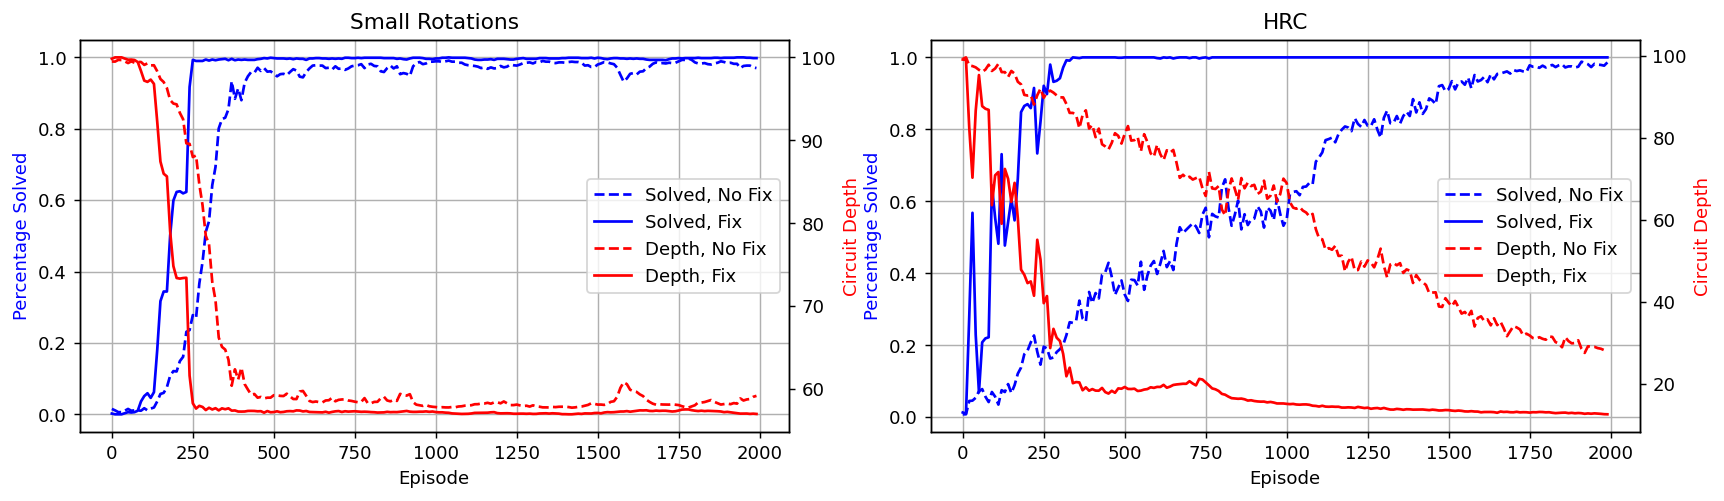

In [90]:
logger1 = loader(data_path("one_qubits_SmallRot_noFix_log.p"))
logger2 = loader(data_path("one_qubits_SmallRot_Fix_log.p"))
logger3 = loader(data_path("one_qubits_HRC_noFix_log.p"))
logger4 = loader(data_path("one_qubits_HRC_Fix_log.p"))

x = list(range(0,2000,10))
fig, (ax11, ax21) = plt.subplots(1, 2, dpi = 130, facecolor='w', edgecolor='k')
ax11.title.set_text('Small Rotations')
ax21.title.set_text('HRC')

ax12 = ax11.twinx()
ax22 = ax21.twinx()

#first plot
#lns1 = ax11.plot(x, len(logger1.fidelity)*[0.99], "k", label = "1 - $\delta$ = 0.99")
lns1 = ax11.plot(x, logger1.solved, "b--", label = "Solved, No Fix")
lns2 = ax11.plot(x, logger2.solved, "b", label = "Solved, Fix")

lns3 =ax12.plot(x, logger1.length, "r--", label = "Depth, No Fix")
lns4 =ax12.plot(x, logger2.length, "r", label = "Depth, Fix")

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]
ax11.legend(lns, labs, loc="right")

ax11.set_xlabel("Episode")
ax11.set_ylabel("Percentage Solved", color='b')
ax12.set_ylabel("Circuit Depth", color='r')

ax11.grid()
#ax11.set_ylim([0.7, 1.01])
#ax12.set_ylim([0.5, 1.01])


#second plot
#lns1 = ax21.plot(x, len(logger1.fidelity)*[0.99], "k", label = "1 - $\delta$ = 0.99")
lns1 = ax21.plot(x, logger3.solved, "b--", label = "Solved, No Fix")
lns2 = ax21.plot(x, logger4.solved, "b", label = "Solved, Fix")

lns3 = ax22.plot(x, logger3.length, "r--", label = "Depth, No Fix")
lns4 = ax22.plot(x, logger4.length, "r", label = "Depth, Fix")

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]
ax21.legend(lns, labs, loc="right")

ax21.set_xlabel("Episode")
ax21.set_ylabel("Percentage Solved", color='b')
ax22.set_ylabel("Circuit Depth", color='r')

ax21.grid()
#ax21.set_ylim([0.7, 1.01])
#ax22.set_ylim([0.5, 1.01])


plt.subplots_adjust(left = -1.1, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.savefig(image_path("one_qubit_fixvsnofix.pdf"), bbox_inches='tight')

plt.show()